## 0622 과제
### 당뇨병 데이터셋에 대해서
### LinearRegression과 DecisionTreeRegressor를 이용하여
### 테스트 데이터 셋에 대하여 값을 예측하고, 데이터 프레임 만들기!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


- 산점도와 선형회귀 직선

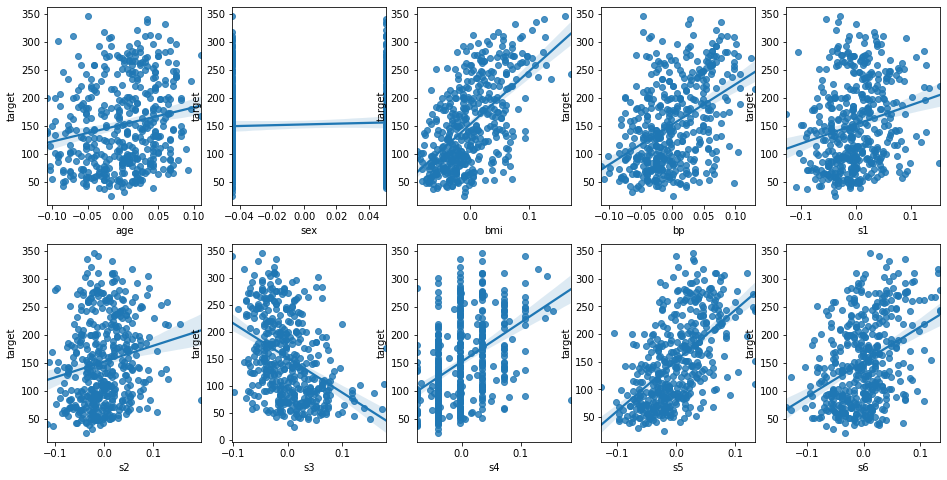

In [3]:
fig, axs = plt.subplots(figsize=(16,8), ncols=5, nrows=2)
for i, feature in enumerate(diabetes.feature_names):
    row, col = i//5, i%5
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

- target vs each feature

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
for feature in diabetes.feature_names:
    X = df[feature].values.reshape(-1,1)
    y = diabetes.target
    lr = LinearRegression()
    lr.fit(X, y)
    r2 = lr.score(X, y)
    print(f'{feature}: {r2:.4f}')

age: 0.0353
sex: 0.0019
bmi: 0.3439
bp: 0.1949
s1: 0.0450
s2: 0.0303
s3: 0.1559
s4: 0.1853
s5: 0.3202
s6: 0.1463


- train/test 분리

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   diabetes.data, diabetes.target, test_size=0.1, random_state=2021
)

- Linear Regression 예측

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# 다중 선형회귀 예측값
lr_y_hat = lr.predict(X_test)
lr_y_hat 

array([156.03121644, 185.70049526, 162.86384045, 162.54544148,
        78.51849397,  60.6006943 , 175.198247  , 176.7708708 ,
       131.42519735,  88.0537722 , 182.06745271, 125.38694592,
       122.94584881, 175.88337484, 165.04366099, 122.46227623,
       154.00789511, 156.28760568, 163.873603  , 190.61471428,
        81.91824922, 149.28474513, 168.78043889,  52.665137  ,
       253.98654186, 253.16663718, 142.5383034 , 201.95489834,
       125.09884927, 155.64491829, 168.33251496, 111.73916649,
       141.34776468, 159.39865731, 129.45826426, 122.49486964,
       155.00302033, 204.71273072, 175.97337738, 231.52683591,
       231.65409045, 186.87966013, 160.36515649, 125.57517593,
        89.00504061])

In [9]:
# Weight
lr.coef_

array([ -14.06014661, -246.92791992,  547.80956855,  286.58708365,
       -656.22582592,  364.21134557,   60.28474402,  182.53318837,
        702.08292875,   68.21197298])

In [10]:
# Bias
lr.intercept_

151.67372554450927

- Decison Tree Regressor 예측

In [11]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# 결정트리 예측값
dt_y_hat = dt.predict(X_test)
dt_y_hat

array([127., 144., 258., 128., 178.,  47., 168., 145., 179., 214.,  55.,
       178.,  88., 172., 181., 160.,  52., 168., 170., 249., 143.,  48.,
        90.,  63., 275., 274., 168.,  52., 182., 164.,  90., 168.,  73.,
        48.,  94.,  77., 136., 281.,  78., 279., 272., 293., 140., 103.,
        75.])

- 결과 비교

In [12]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, lr_y_hat)
mse_dt = mean_squared_error(y_test, dt_y_hat)
print(f'MSE -- LR: {mse_lr:.4f}, DTR: {mse_dt:.4f}')

MSE -- LR: 2370.1979, DTR: 7270.2444


In [13]:
y_test.shape, lr_y_hat.shape, dt_y_hat.shape

((45,), (45,), (45,))

- 데이터프레임 만들기

In [14]:
# 실제값
y_test

array([155., 167., 185., 109.,  65.,  77., 277., 244., 148., 102., 200.,
       162.,  59., 147., 216., 144.,  85., 131., 196., 212.,  60., 252.,
       121.,  78., 275., 336., 190., 221., 103., 156., 235., 102., 115.,
       276., 140.,  83.,  95., 151., 141., 128., 217., 170., 110., 191.,
        91.])

In [15]:
df = pd.DataFrame({'y_test':y_test, 'lr':lr_y_hat, 'dt':dt_y_hat})
df.head()

,y_test,lr,dt
0,155.0,156.031216,127.0
1,167.0,185.700495,144.0
2,185.0,162.863840,258.0
3,109.0,162.545441,128.0
4,65.0,78.518494,178.0
